# Assignment 03
# Due: Wednesday, June 19, 2024, 3:59 PM
## Instructions:
1. Once the notebook is completed, export to .py file.  Submit both the notebook and the .py file.  To do this, click export at the top of the notebook or ctrl + shift + p at the top of the notebook and type in export.  Export to python file should show up as a search result.  Also:
    - Ensure that your .py file is an exact replica of your .ipynb file.  
    - Ensure your .py and .ipynb files run successfully without any errors.  You should be able to click `Run All` in VS Code and run the notebook without error before converting to a .py file.  When completed, you should be able to run the .py file from the terminal or command prompt.
2. DO NOT submit the data from the assignment and keep your data file and python file in the same directory. Do not use your local directory path to read files (e.g., avoid using paths like C:/your/directory/file.csv).  Just read in the file directly as if though it was in the same directory as your .ipynb file
3. Whenever we ask to .head(10) the results or print out a value, please use `print()` so for example `print(df.head(10))`. Print only the answers to the questions that have been asked.  Do not print the head of a dataset unless explicitly asked. 
4. Whenever displaying a graph use `plt.show()`
5. For theoretical answers/short answers, please use print() (e.g., print("your answer")).
6. Wherever we have code displayed to print out values, use that code as a template to print out your output.  For example, if we give you `print(f'Threshold for best accuracy: {}')` please use code in this style to print out your output.  For some questions, this is only a template as we expect you to print out multiple answers (For example....Fit a linear regression model to each of the 5 features INDIVUDALLY and print out the slope and intercept for each. (Don't forget train/test split) requires you use the template for each feature)
7. Do not include pip install commands in your code. You can assume that all required libraries are already installed.

# Assignment 03 - Part 1: Gradient Descent
## Instructions:
Download your file from https://clarksonmsda.org/datafiles/fuel/.  Your number is the same as the previous assignment.

1. Use the gradient descent script we developed in class to find the line of of best fit for your fuel file.  You may want to run for more epochs, since we are working with more data.  Graph the loss as a function of epoch, as we did in class.

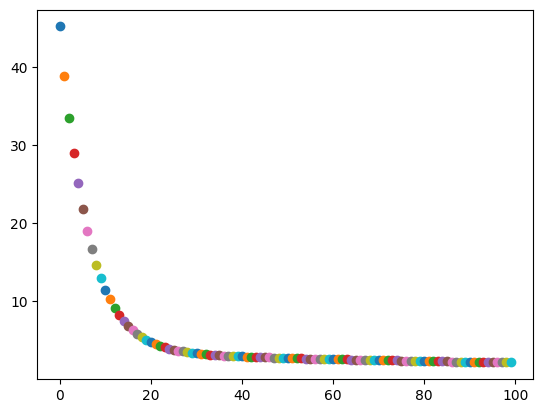

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fuel_df = pd.read_csv('gas0.csv', index_col=0)

X = fuel_df['vehicle_tons']
y = fuel_df['gas_pumped']

epochs = 100
learning_rate = 0.01
slope = 0
intercept = 0
n = len(X)

line_history = []

for i in np.arange(epochs):
    y_predict = X*slope + intercept
    D_m = (-2/n) * np.sum(X * (y - y_predict))  # Derivative wrt m
    D_c = (-2/n) * np.sum(y - y_predict)  # Derivative wrt c
    slope = slope - (learning_rate * D_m)
    intercept = intercept - (learning_rate * D_c)
    plt.scatter(i, np.sum((y - y_predict)**2)/n)
    line_history.append(
        {'Slope': slope, 'Intercept': intercept, 'Loss': np.sum((y - y_predict)**2)/n})
    
plt.show()


2. Print your final slope and intercept terms (we also referred to our slope as m and our intercept as c)

In [2]:
print(f'Final slope: {slope}')
print(f'Final intercept: {intercept}')

Final slope: 2.3445026703234317
Final intercept: 2.552229196531413


3. Print the total final loss (sum of squared residuals divided by n)

In [3]:
print(f'Total final loss: {np.sum((y - y_predict)**2)/n}')

Total final loss: 2.166734463786148


4. Plot the final line and points

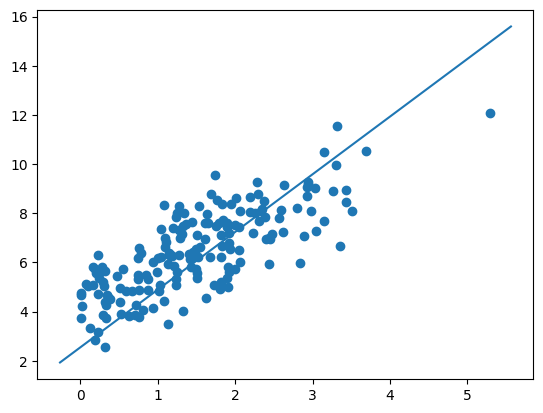

In [4]:
def abline(slope,intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = x_vals*slope + intercept
    plt.plot(x_vals, y_vals, '-')

plt.scatter(X,y)
abline(slope, intercept)
plt.show()

5. Let's observe the effect of initializing the slope (m) and intercept (c) as random integers?  

    a. In the cell below copy your code above and generate a random integer for the initial slope and intercept from 10 to 20 (hint: use np.random.randint and the high and low arguments).  As above, plot the loss as a function of epoch

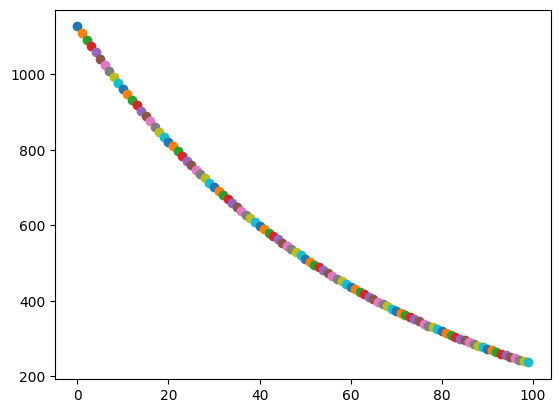

In [5]:
# Set a random seed of your choice, so your random numbers always come out the same
np.random.seed(42)
# Use same code as above (except initialize slope and intercept to random integers)
# Your code below.......
epochs = 100
learning_rate = 0.001
slope = np.random.randint(low=10, high=21)
intercept = np.random.randint(low=10, high=21)
n = len(X)

line_history = []

for i in np.arange(epochs):
    y_predict = X*slope + intercept
    D_m = (-2/n) * np.sum(X * (y - y_predict))  # Derivative wrt m
    D_c = (-2/n) * np.sum(y - y_predict)  # Derivative wrt c
    slope = slope - (learning_rate * D_m)
    intercept = intercept - (learning_rate * D_c)
    plt.scatter(i, np.sum((y - y_predict)**2)/n)
    line_history.append(
        {'Slope': slope, 'Intercept': intercept, 'Loss': np.sum((y - y_predict)**2)/n})
    
plt.show()

b. Print out your final slope and intercept for this new training.

In [6]:
print(f'Final slope: {slope}')
print(f'Final intercept: {intercept}')

Final slope: 7.80033320614429
Final intercept: 8.745514799167662


c. Plot the final line and points

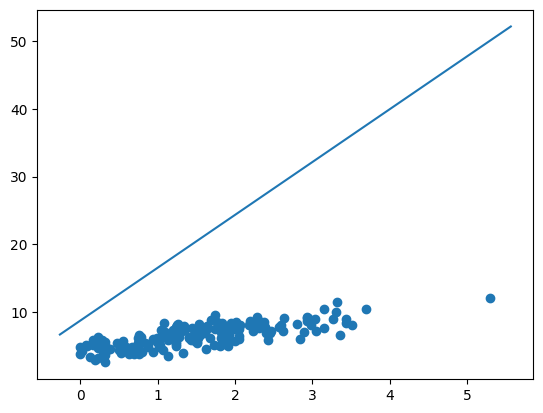

In [7]:
def abline(slope,intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = x_vals*slope + intercept
    plt.plot(x_vals, y_vals, '-')

plt.scatter(X,y)
abline(slope, intercept)
plt.show()

d. What effect does it have on the loss and the approach to the actual slope values?

In [8]:
print("""You answer here""")

You answer here


6. Try different learning rates.  

    a. Use the list of learning rates below (called learning_rates).  Loop through those learning rates and try different rates for 100 epochs.  For each rate, print out the learning rate, final slope, final intercept and total final loss and graph the loss against the epoch as above.

Learning Rate: 0.0001
Final slope: 0.21217086178531222
Final intercept: 0.12554006551697514
Total final loss: 39.18667995930852


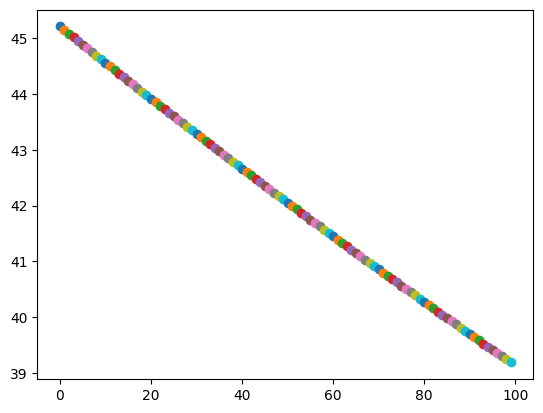

Learning Rate: 0.001
Final slope: 1.513293112541353
Final intercept: 0.9400951893262013
Total final loss: 12.117813419088515


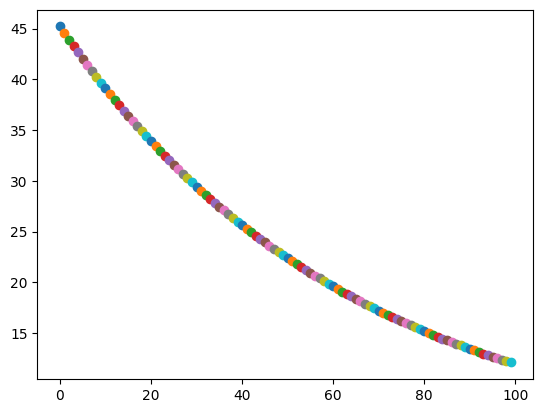

Learning Rate: 0.01
Final slope: 2.3445026703234317
Final intercept: 2.552229196531413
Total final loss: 2.166734463786148


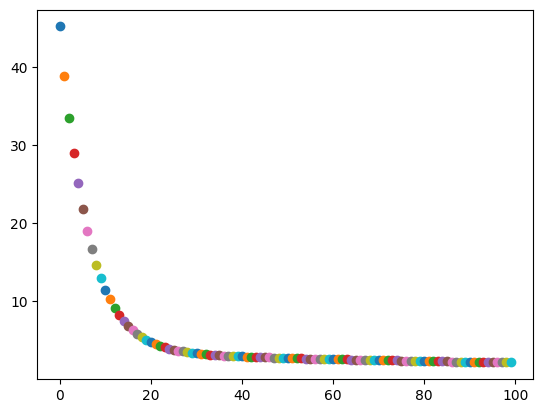

Learning Rate: 0.1
Final slope: 1.4178894198781753
Final intercept: 4.361522327937324
Total final loss: 1.1836786277727143


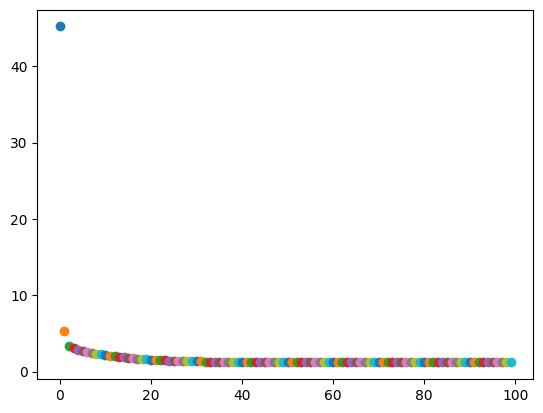

Learning Rate: 1
Final slope: -1.3649305798654127e+84
Final intercept: -6.997992457456899e+83
Total final loss: 1.9627076524047193e+167


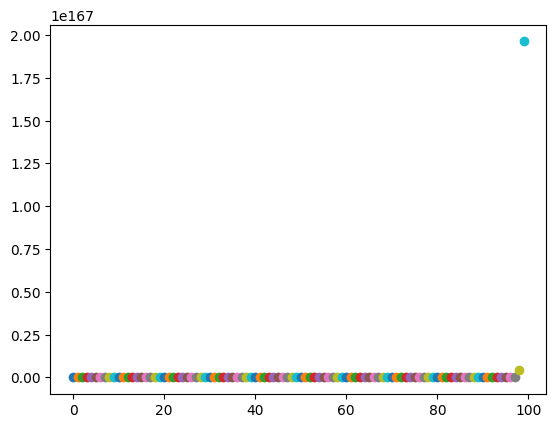

Learning Rate: 5
Final slope: -6.580620895026824e+158
Final intercept: -3.373881138579354e+158
Total final loss: inf


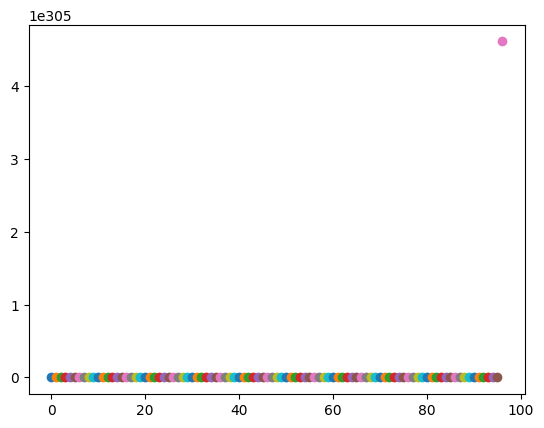

In [9]:
# Code for trying different learning rates here.  
# You can just copy the code from above and manually change the values to see what happens
# Be sure 
epochs = 100
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]
n = len(X)

line_history = []

for learning_rate in learning_rates:
    slope = 0
    intercept = 0
    for i in np.arange(epochs):
        y_predict = X*slope + intercept
        D_m = (-2/n) * np.sum(X * (y - y_predict))  # Derivative wrt m
        D_c = (-2/n) * np.sum(y - y_predict)  # Derivative wrt c
        slope = slope - (learning_rate * D_m)
        intercept = intercept - (learning_rate * D_c)
        plt.scatter(i, np.sum((y - y_predict)**2)/n)
        
    print(f'Learning Rate: {learning_rate}')
    print(f'Final slope: {slope}')
    print(f'Final intercept: {intercept}')
    print(f'Total final loss: {np.sum((y - y_predict)**2)/n}')
    
    plt.show()

b. What is the 'best' learning rate?  What happens when the learning rate is too big?  What happens when it is too small? 

In [10]:
print("""Your answer here""")

Your answer here


Extra Credit:
7. Propose a method for implementing stochastic gradient descent.

In [11]:
print("""Your answer here""")

Your answer here


# Assignment 02 - Part 2: Student Performance with sklearn
## Instructions:
Use the `student.csv` file

8. Plot each x against the y (Performance Index).  Make the title of each graph the name of the feature vs Performance Index (e.g. 'Hours Studied vs. Performance Index')

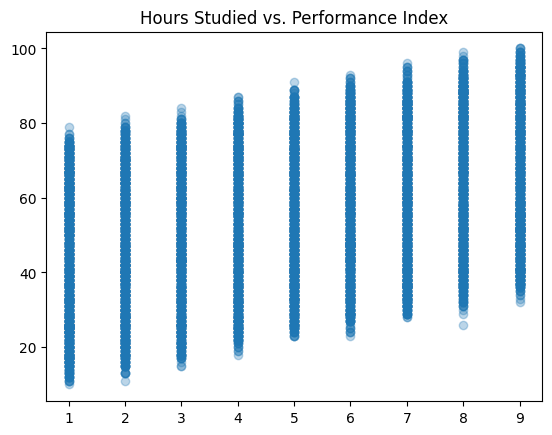

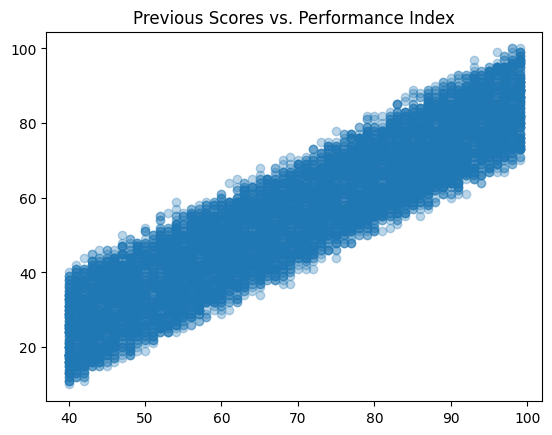

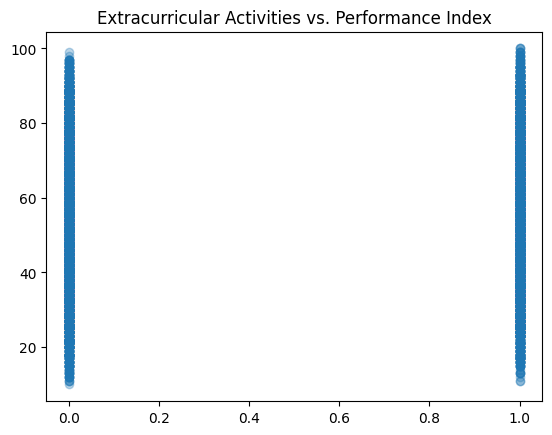

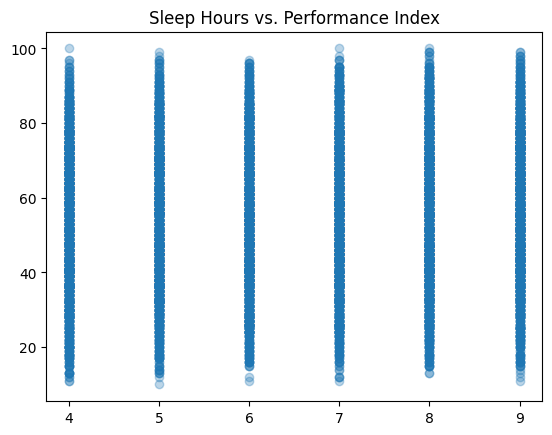

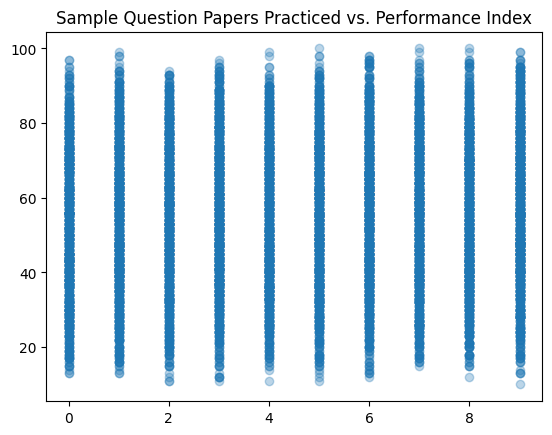

In [12]:
student_df = pd.read_csv('students.csv')
student_df['Extracurricular Activities'] = np.where(student_df['Extracurricular Activities']=='Yes',1,0)

for c in student_df.columns:
    if c != 'Performance Index':
        plt.scatter(student_df[c], student_df['Performance Index'], alpha=0.3)
        plt.title(f'{c} vs. Performance Index')
        plt.show()

9. Fit a linear regression model to each of the 5 features INDIVIDUALLY and print out the slope, intercept and mean squared error for each. (Don't forget train/test split - use test_size of 0.2 and a random_state of 42).  hint: You may think to One-Hot Encode the Extracurricular Activities variable, but since it is just Yes or No, best to engineer a single feature/column where Yes=1 and No=0

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = student_df[['Hours Studied',
                'Previous Scores',
                'Extracurricular Activities',
                'Sleep Hours',
                'Sample Question Papers Practiced']]

y = student_df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

for c in X.columns:
    reg = LinearRegression().fit(X_train[[c]], y_train)
    y_pred = reg.predict(X_test[[c]])
    print(f'Feature: {c}\n  Slope: {reg.coef_[0]}\n  Intercept {reg.intercept_}\n  Mean Squared Error {mean_squared_error(y_test, y_pred)}')

Feature: Hours Studied
  Slope: 2.7843004411707217
  Intercept 41.43663482653601
  Mean Squared Error 321.8145383172104
Feature: Previous Scores
  Slope: 1.012727202917999
  Intercept -15.104435146091397
  Mean Squared Error 58.949059849219644
Feature: Extracurricular Activities
  Slope: 0.7177801984741885
  Intercept 54.95646796932971
  Mean Squared Error 370.2413696204843
Feature: Sleep Hours
  Slope: 0.5023487925251992
  Intercept 52.025322580097345
  Mean Squared Error 369.4355855609035
Feature: Sample Question Papers Practiced
  Slope: 0.29453398040254025
  Intercept 53.95178387947168
  Mean Squared Error 370.15143988317357


10. Which is the best single feature based on mean_squared_error?

In [14]:
print("""Your answer here""")

Your answer here


11. Use different test sizes in the array [0.3,0.5,0.7] with that one single feature.  Also use a random_state of 42.  Print out the test size, slope, intercept and test mean squared error.

In [15]:
tt_splits = [0.3,0.5,0.7]

for t in tt_splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, random_state=42)
    reg = LinearRegression().fit(X_train[['Previous Scores']], y_train)
    y_pred = reg.predict(X_test[['Previous Scores']])
    print(f'Test Size: {t}\n  Slope: {reg.coef_[0]}\n  Intercept {reg.intercept_}\n  Mean Squared Error {mean_squared_error(y_test, y_pred)}')


Test Size: 0.3
  Slope: 1.012209220837166
  Intercept -15.052650308263189
  Mean Squared Error 58.593853217062524
Test Size: 0.5
  Slope: 1.0108984138590011
  Intercept -15.01229514763164
  Mean Squared Error 59.358953919812734
Test Size: 0.7
  Slope: 1.007598940495639
  Intercept -14.971018500630315
  Mean Squared Error 59.95487067532469


12. What is the result of changing the training size?

In [16]:
print("""Your Answer Here""")

Your Answer Here


13. Fit a linear regression model to all the features (multiple x features).  Print out the slope and the weights for each feature.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)

for feature_name,weight in zip(reg.feature_names_in_, reg.coef_):
    print(f'Feature Name: {feature_name}\n  Weight: {weight}')

print(f'Intercept {reg.intercept_}')

Feature Name: Hours Studied
  Weight: 2.852483930072525
Feature Name: Previous Scores
  Weight: 1.016988198932932
Feature Name: Extracurricular Activities
  Weight: 0.6086166795764233
Feature Name: Sleep Hours
  Weight: 0.47694148417627186
Feature Name: Sample Question Papers Practiced
  Weight: 0.19183144145054268
Intercept -33.921946215556126


14. Call predict with new data and print out the mean squared error.

In [18]:
y_pred = reg.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 4.082628398521853


15. Plot your test y values against your predicted y values

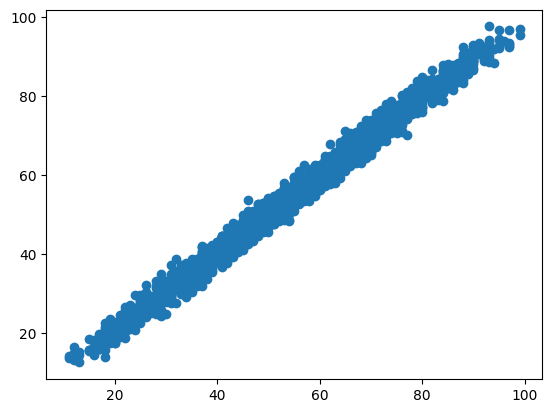

In [19]:
plt.scatter(y_test,y_pred)
plt.show()

15. Is the result intuitive? (Does it seem to fit what you would expect for a student who performs well vs. poorly)

In [20]:
print("""Your Answer Here""")

Your Answer Here


In [21]:
import statsmodels.api as sm


X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.398e+05
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:05:44   Log-Likelihood:                -17063.
No. Observations:                8000   AIC:                         3.414e+04
Df Residuals:                    7994   BIC:                         3.418e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   